In [8]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6aac6d79-9401-4c7e-8ba3-f473714fc102',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-01-02T17:01:40.882Z', 'error_code': 0, 'error_message': None, 'elapsed': 45, 'credit_count': 1, 'notice': None, 'total_count': 8976}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10690, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [9]:
type(data)


dict

In [10]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.958766e+07,1.958766e+07,False,NaN,1,NaN,NaN,None,2024-01-02T17:00:00.000Z,45391.937576,3.890861e+10,156.1794,0.376539,6.245993,7.268903,14.387417,30.957625,64.940467,8.891219e+11,51.2203,9.532307e+11,None,2024-01-02T17:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:01:40.914447
1,1027,Ethereum,ETH,ethereum,8162,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201851e+08,1.201851e+08,True,NaN,2,NaN,NaN,None,2024-01-02T17:00:00.000Z,2369.350910,1.241830e+10,87.9467,0.409032,2.575602,6.627062,9.658087,30.413417,44.661429,2.847606e+11,16.4044,2.847606e+11,None,2024-01-02T17:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:01:40.914447
2,825,Tether USDt,USDT,tether,70342,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.171000e+10,9.460306e+10,True,NaN,3,NaN,NaN,None,2024-01-02T17:00:00.000Z,1.000783,5.903258e+10,75.0459,-0.008294,0.065078,0.120833,0.045425,0.035876,0.077342,9.178180e+10,5.2873,9.467712e+10,None,2024-01-02T17:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-02 19:01:40.914447
3,5426,Solana,SOL,solana,610,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.300178e+08,5.662201e+08,True,NaN,4,NaN,NaN,None,2024-01-02T17:00:00.000Z,110.280293,3.757828e+09,89.8317,0.470223,3.376346,-1.648163,75.416318,177.653174,380.937488,4.742249e+10,2.7319,6.244292e+10,None,2024-01-02T17:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:01:40.914447
4,1839,BNB,BNB,bnb,1963,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516919e+08,1.516919e+08,False,NaN,5,NaN,NaN,None,2024-01-02T17:00:00.000Z,311.197310,1.110771e+09,20.8334,0.612121,-0.226149,4.434455,36.996662,35.887599,46.447476,4.720611e+10,2.7194,4.720611e+10,None,2024-01-02T17:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:01:40.914447
5,52,XRP,XRP,xrp,1194,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.412515e+10,9.998810e+10,False,NaN,6,NaN,NaN,None,2024-01-02T17:00:00.000Z,0.627401,1.283058e+09,67.3836,0.124278,0.948645,0.595944,1.089357,2.935802,17.741735,3.395817e+10,1.9563,6.274009e+10,None,2024-01-02T17:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:01:40.914447
6,3408,USDC,USDC,usd-coin,15925,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.469790e+10,2.469790e+10,False,NaN,7,NaN,NaN,None,2024-01-02T17:00:00.000Z,1.000119,6.743941e+09,101.7948,0.009223,-0.004901,0.023575,0.020813,-0.007077,0.004616,2.470085e+10,1.4230,2.470085e+10,None,2024-01-02T17:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-02 19:01:40.914447
7,2010,Cardano,ADA,cardano,1017,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.536641e+10,3.649892e+10,False,NaN,8,NaN,NaN,None,2024-01-02T17:00:00.000Z,0.617787,5.863206e+08,44.6532,0.494605,2.244976,1.224022,57.796468,94.424772,140.401811,2.184891e+10,1.2587,2.780042e+10,None,2024-01-02T17:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:01:40.914447
8,5805,Avalanche,AVAX,avalanche,627,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08

In [40]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '6aac6d79-9401-4c7e-8ba3-f473714fc102',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'D:\Data analysis & Data science\Projects\Python projects\Automated crypto website\API.csv'):
        df.to_csv(r'D:\Data analysis & Data science\Projects\Python projects\Automated crypto website\API.csv',header = 'column_names')
    else:
        df.to_csv(r'D:\Data analysis & Data science\Projects\Python projects\Automated crypto website\API.csv',mode='a',header = False)

In [41]:
import os
from time import time
from time import sleep

for i in range(330):
    api_runner()
    print('API runner completed')
    sleep(60)
exit()

{'status': {'timestamp': '2024-01-02T17:48:52.620Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 8976}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10690, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [42]:
df=pd.read_csv(r'D:\Data analysis & Data science\Projects\Python projects\Automated crypto website\API.csv')

In [43]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.958766e+07,1.958766e+07,False,NaN,1,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,45075.122368,3.944613e+10,161.1494,-0.406229,5.320180,7.634901,14.109914,31.094321,63.588112,8.829163e+11,51.1675,9.465776e+11,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
1,1,1027,Ethereum,ETH,ethereum,8162,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201851e+08,1.201851e+08,True,NaN,2,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,2357.144562,1.245015e+10,88.3013,-0.447284,1.878318,7.460292,9.475644,30.767913,43.772360,2.832936e+11,16.4177,2.832936e+11,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
2,2,825,Tether USDt,USDT,tether,70342,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.171000e+10,9.460306e+10,True,NaN,3,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,1.000535,5.962487e+10,77.0276,-0.008506,0.043482,0.066296,0.030522,0.016981,0.065162,9.175903e+10,5.3177,9.465363e+10,NaN,2024-01-02T17:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-02 19:48:52.463475
3,3,1839,BNB,BNB,bnb,1963,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516919e+08,1.516919e+08,False,NaN,4,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,310.147291,1.118544e+09,22.4537,-0.047935,-0.466171,6.235956,36.885297,35.969129,45.742260,4.704683e+10,2.7265,4.704683e+10,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
4,4,5426,Solana,SOL,solana,610,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.300178e+08,5.662201e+08,True,NaN,5,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,107.529472,3.820771e+09,93.4572,-2.195506,1.092091,0.861513,72.189747,175.146172,367.935018,4.623958e+10,2.6797,6.088535e+10,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
5,5,52,XRP,XRP,xrp,1194,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.412515e+10,9.998810e+10,False,NaN,6,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,0.624026,1.294745e+09,69.6809,-0.419328,0.346596,2.242850,0.922577,3.069544,16.403386,3.377548e+10,1.9574,6.240256e+10,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
6,6,3408,USDC,USDC,usd-coin,15925,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.469790e+10,2.469790e+10,False,NaN,7,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,1.000382,6.881828e+09,106.2850,0.048967,0.030659,0.016948,0.045899,0.035371,0.041303,2.470734e+10,1.4319,2.470734e+10,NaN,2024-01-02T17:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-02 19:48:52.463475
7,7,2010,Cardano,ADA,cardano,1017,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.536641e+10,3.649892e+10,False,NaN,8,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,0.613226,5.894555e+08,46.6570,-0.530751,1.515508,5.098230,57.646136,94.092689,138.978415,2.168760e+10,1.2569,2.759516e+10,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
8,8,5805,Avalanche,AVAX,avalanche,627,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi.

In [44]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10690,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19587662.00000,19587662.00000,False,NaN,1,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,45075.12237,39446131063.59738,161.14940,-0.40623,5.32018,7.63490,14.10991,31.09432,63.58811,882916261546.67542,51.16750,946577569721.18994,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
1,1,1027,Ethereum,ETH,ethereum,8162,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120185070.56653,120185070.56653,True,NaN,2,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,2357.14456,12450149001.42318,88.30130,-0.44728,1.87832,7.46029,9.47564,30.76791,43.77236,283293585482.68042,16.41770,283293585482.67999,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
2,2,825,Tether USDt,USDT,tether,70342,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,91710003321.28868,94603058345.25459,True,NaN,3,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,1.00053,59624871371.40926,77.02760,-0.00851,0.04348,0.06630,0.03052,0.01698,0.06516,91759033012.76073,5.31770,94653634712.00999,NaN,2024-01-02T17:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-02 19:48:52.463475
3,3,1839,BNB,BNB,bnb,1963,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151691894.02117,151691894.02117,False,NaN,4,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,310.14729,1118543511.23249,22.45370,-0.04794,-0.46617,6.23596,36.88530,35.96913,45.74226,47046830010.41741,2.72650,47046830010.42000,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
4,4,5426,Solana,SOL,solana,610,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,430017780.66841,566220102.60476,True,NaN,5,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,107.52947,3820770874.41661,93.45720,-2.19551,1.09209,0.86151,72.18975,175.14617,367.93502,46239584768.60093,2.67970,60885348488.11000,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
5,5,52,XRP,XRP,xrp,1194,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54125149173.00000,99988100379.00000,False,NaN,6,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,0.62403,1294744964.21469,69.68090,-0.41933,0.34660,2.24285,0.92258,3.06954,16.40339,33775476118.19613,1.95740,62402555252.53000,NaN,2024-01-02T17:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-02 19:48:52.463475
6,6,3408,USDC,USDC,usd-coin,15925,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,24697901139.04363,24697901139.04363,False,NaN,7,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,1.00038,6881827951.71612,106.28500,0.04897,0.03066,0.01695,0.04590,0.03537,0.04130,24707338521.31911,1.43190,24707338521.32000,NaN,2024-01-02T17:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-02 19:48:52.463475
7,7,2010,Cardano,ADA,cardano,1017,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35366413354.08500,36498916808.90700,False,NaN,8,NaN,NaN,NaN,2024-01-02T17:47:00.000Z,0.61323,589455495.36315,46.65700,-0.53075,1.51551,5.09823,57.64614,94.09269,138.97841,21687596029.15527,1.25690,27595159609.23000,NaN,2024-01-02T17:47:00.00

In [45]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.61020,5.26078,7.59698,13.97284,31.00931,63.45656
Ethereum,-0.53913,1.86811,7.50053,9.37596,30.68227,43.67793
Tether USDt,-0.01580,0.02785,0.06055,0.01578,-0.01257,0.05094
BNB,-0.15953,-0.49148,6.36882,36.83340,35.92910,45.68832
Solana,-2.42108,0.92694,1.09172,71.89865,175.13713,366.85870
XRP,-0.49720,0.28682,2.25432,0.86772,3.05422,16.31468
USDC,0.03312,0.00553,0.01327,0.02722,0.00711,0.01964
Cardano,-0.63934,1.43209,5.20229,57.58164,94.07710,138.85990
Avalanche,-0.71386,2.64412,-5.19284,89.29961,244.64876,314.81984


In [46]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.61020
             quote.USD.percent_change_24h     5.26078
             quote.USD.percent_change_7d      7.59698
             quote.USD.percent_change_30d    13.97284
             quote.USD.percent_change_60d    31.00931
             quote.USD.percent_change_90d    63.45656
Ethereum     quote.USD.percent_change_1h     -0.53913
             quote.USD.percent_change_24h     1.86811
             quote.USD.percent_change_7d      7.50053
             quote.USD.percent_change_30d     9.37596
             quote.USD.percent_change_60d    30.68227
             quote.USD.percent_change_90d    43.67793
Tether USDt  quote.USD.percent_change_1h     -0.01580
             quote.USD.percent_change_24h     0.02785
             quote.USD.percent_change_7d      0.06055
             quote.USD.percent_change_30d     0.01578
             quote.USD.percent_change_60d    -0.01257
             quote.USD.percent_change_90

In [49]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.61020
            quote.USD.percent_change_24h   5.26078
            quote.USD.percent_change_7d    7.59698
            quote.USD.percent_change_30d  13.97284
            quote.USD.percent_change_60d  31.00931
            quote.USD.percent_change_90d  63.45656
Ethereum    quote.USD.percent_change_1h   -0.53913
            quote.USD.percent_change_24h   1.86811
            quote.USD.percent_change_7d    7.50053
            quote.USD.percent_change_30d   9.37596
            quote.USD.percent_change_60d  30.68227
            quote.USD.percent_change_90d  43.67793
Tether USDt quote.USD.percent_change_1h   -0.01580
            quote.USD.percent_change_24h   0.02785
            quote.USD.percent_change_7d    0.06055
            quote.USD.percent_change_30d   0.01578
            quote.USD.percent_change_60d  -0.01257
            quote.USD.percent_change_90d   0.05094
BNB         quote.USD.percent_change_1h   -0.15953
            quote.USD.percent_change_24h  -0.49148
            quote.USD.percent_change_7d    6.36882
            quote.USD.percent_change_30d  36.83340
            quote.USD.percent_change_60d  35.92910
            quote.USD.percent_change_90d  45.68832
Solana      quote.USD.percent_change_1h   -2.42108
            quote.USD.percent_change_24h   0.92694
            quote.USD.percent_change_7d    1.09172
            quote.USD.percent_change_30d  71.89865
            quote.USD.percent_change_60d 175.13713
            quote.USD.percent_change_90d 366.85870
XRP         quote.USD.percent_change_1h   -0.49720
            quote.USD.percent_change_24h   0.28682
            quote.USD.percent_change_7d    2.25432
            quote.USD.percent_change_30d   0.86772
            quote.USD.percent_change_60d   3.05422
            quote.USD.percent_change_90d  16.31468
USDC        quote.USD.percent_change_1h    0.03312
            quote.USD.percent_change_24h   0.00553
            quote.USD.percent_change_7d    0.01327
            quote.USD.percent_change_30d   0.02722
            quote.USD.percent_change_60d   0.00711
            quote.USD.percent_change_90d   0.01964
Cardano     quote.USD.percent_change_1h   -0.63934
            quote.USD.percent_change_24h   1.43209
            quote.USD.percent_change_7d    5.20229
            quote.USD.percent_change_30d  57.58164
            quote.USD.percent_change_60d  94.07710
            quote.USD.percent_change_90d 138.85990
Avalanche   quote.USD.percent_change_1h   -0.71386
            quote.USD.percent_change_24h   2.64412
            quote.USD.percent_change_7d   -5.19284
            quote.USD.percent_change_30d  89.29961
            quote.USD.percent_change_60d 244.64876
            quote.USD.percent_change_90d 314.81984
Dogecoin    quote.USD.percent_change_1h   -0.27081
            quote.USD.percent_change_24h   0.34460
            quote.USD.percent_change_7d    2.19233
            quote.USD.percent_change_30d   8.98407
            quote.USD.percent_change_60d  35.79933
            quote.USD.percent_change_90d  49.81355
Polkadot    quote.USD.percent_change_1h   -0.56395
            quote.USD.percent_change_24h   0.96688
            quote.USD.percent_change_7d   -1.46574
            quote.USD.percent_change_30d  54.50192
            quote.USD.percent_change_60d  84.35653
            quote.USD.percent_change_90d 109.49357
TRON        quote.USD.percent_change_1h    0.36907
            quote.USD.percent_change_24h   2.19091
            quote.USD.percent_change_7d    6.77883
            quote.USD.percent_change_30d   6.34527
            quote.USD.percent_change_60d  12.07049
            quote.USD.percent_change_90d  22.92023
Polygon     quote.USD.percent_change_1h   -0.38236
            quote.USD.percent_change_24h  -0.73004
            quote.USD.percent_change_7d    6.71254
            quote.USD.percent_change_30d  22.13354
            quote.USD.percent_change_60d  49.08707
            quo

In [50]:
df5.count()

values    90
dtype: int64

In [53]:
index = pd.Index(range(90))
df6 = df5.set_index(index)
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.61020
1,Bitcoin,quote.USD.percent_change_24h,5.26078
2,Bitcoin,quote.USD.percent_change_7d,7.59698
3,Bitcoin,quote.USD.percent_change_30d,13.97284
4,Bitcoin,quote.USD.percent_change_60d,31.00931
5,Bitcoin,quote.USD.percent_change_90d,63.45656
6,Ethereum,quote.USD.percent_change_1h,-0.53913
7,Ethereum,quote.USD.percent_change_24h,1.86811
8,Ethereum,quote.USD.percent_change_7d,7.50053
9,Ethereum,quote.USD.percent_change_30d,9.37596


In [57]:
df7=df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.61020
1,Bitcoin,quote.USD.percent_change_24h,5.26078
2,Bitcoin,quote.USD.percent_change_7d,7.59698
3,Bitcoin,quote.USD.percent_change_30d,13.97284
4,Bitcoin,quote.USD.percent_change_60d,31.00931
5,Bitcoin,quote.USD.percent_change_90d,63.45656
6,Ethereum,quote.USD.percent_change_1h,-0.53913
7,Ethereum,quote.USD.percent_change_24h,1.86811
8,Ethereum,quote.USD.percent_change_7d,7.50053
9,Ethereum,quote.USD.percent_change_30d,9.37596


In [63]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d','quote.USD.percent_change_1h'],['24h','7d','30d','60d','90d','1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.61020
1,Bitcoin,24h,5.26078
2,Bitcoin,7d,7.59698
3,Bitcoin,30d,13.97284
4,Bitcoin,60d,31.00931
5,Bitcoin,90d,63.45656
6,Ethereum,1h,-0.53913
7,Ethereum,24h,1.86811
8,Ethereum,7d,7.50053
9,Ethereum,30d,9.37596


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\filoa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


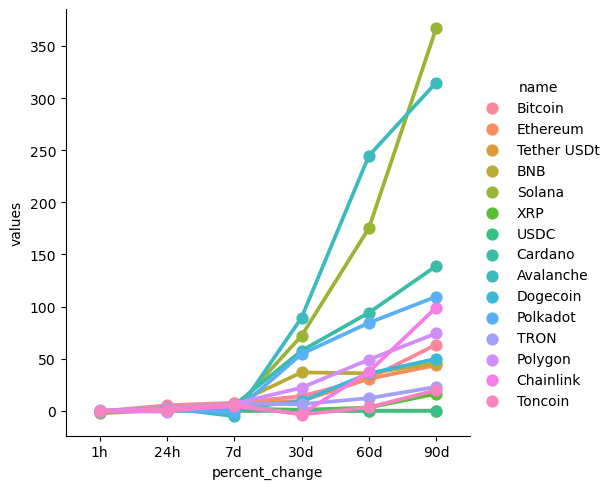

In [65]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [66]:
df11 = df[['name','quote.USD.price','timestamp']]
df11 = df11.query("name == 'Bitcoin'")
df11

,name,quote.USD.price,timestamp
0,Bitcoin,45075.12237,2024-01-02 19:48:52.463475
15,Bitcoin,45053.43802,2024-01-02 19:49:53.171752
30,Bitcoin,45006.60229,2024-01-02 19:50:53.971807


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

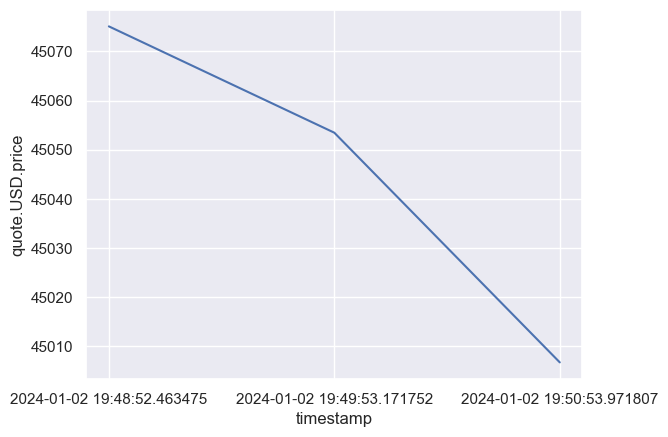

In [67]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df11)
